In [ ]:
import numpy as np

from tensorflow.keras.applications.resnet import ResNet50
from keras.layers import GlobalAveragePooling2D
base_model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
x=base_model.output



for layer in base_model.layers:
  layer.trainable=False


In [ ]:
#x=base_model.output
from keras.models import Model
from keras.layers import Flatten, Dense
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
predictions=Dense(1,activation='sigmoid')(x)
model_final=Model(base_model.input,predictions)

In [ ]:
model_final.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=False,validation_split=0.2)
testgen=ImageDataGenerator(rescale=1./255,horizontal_flip=False)
train_generator=datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset-01.03.2022/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset="training")
val_generator=datagen.flow_from_directory('/content/gdrive/MyDrive/Dataset-01.03.2022/training_set',target_size=(224,224),batch_size=32,class_mode='binary',subset="validation")
test_generator=testgen.flow_from_directory('/content/gdrive/MyDrive/Dataset-01.03.2022/test_set',target_size=(224,244),batch_size=32,class_mode='binary')

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
model_final.fit_generator(train_generator,validation_data=val_generator,epochs=5,steps_per_epoch=10,validation_steps=10,shuffle=True,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
10/10 [==============================] - 151s 14s/step - loss: 1.0345 - accuracy: 0.7219 - val_loss: 0.2507 - val_accuracy: 0.9156
Epoch 2/5
10/10 [==============================] - 83s 9s/step - loss: 0.1656 - accuracy: 0.9500 - val_loss: 0.0974 - val_accuracy: 0.9563
Epoch 3/5
10/10 [==============================] - 94s 10s/step - loss: 0.0681 - accuracy: 0.9719 - val_loss: 0.0837 - val_accuracy: 0.9781
Epoch 4/5
10/10 [==============================] - 68s 7s/step - loss: 0.0852 - accuracy: 0.9781 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 5/5
10/10 [==============================] - 56s 6s/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0593 - val_accuracy: 0.9906


In [ ]:
#Save your model
model_final.save('dogcat_inception.h5')
history=model_final.history
#steps=test_generator.n//batch_size

loss,acc=model_final.evaluate(test_generator, steps=10)
print('Test result is: loss:%f, accuracy:%f'%(loss,acc))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test result is: loss:0.049889, accuracy:0.975000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


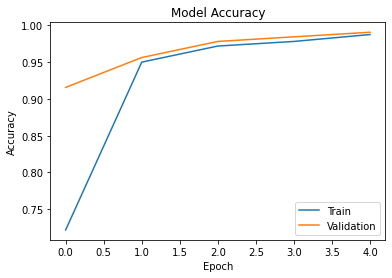

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.savefig('modelaccuracy.png')

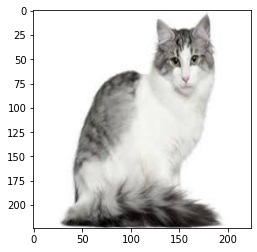

In [ ]:
from skimage import io
import cv2
import numpy as np
image_path='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-qVyKwF4uUrg0Y1Iti50EfsC34-e3O0Gu3Q&usqp=CAU'
img=io.imread(image_path)
x=cv2.resize(img,(224,224))
imgplot=plt.imshow(x)
x=np.expand_dims(x,axis=0)
preds=model_final.predict(x)
predicts=np.argmax(preds,axis=1)


In [ ]:
if predicts[0]==0:
  print("Cat")
else:
  print("Dog")

Cat
